In [ ]:
# model and trial

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/tweet_content_only'

test  train


In [ ]:
import pandas as pd


df_x1 = pd.read_csv("/content/drive/MyDrive/tweet_content_only/train/X_train.csv")
df_y1 = pd.read_csv("/content/drive/MyDrive/tweet_content_only/train/y_train.csv")
df_train = pd.concat([df_x1,df_y1], axis=1)

df_x2 = pd.read_csv("/content/drive/MyDrive/tweet_content_only/test/X_test.csv")
df_y2 = pd.read_csv("/content/drive/MyDrive/tweet_content_only/test/y_test.csv")
df_test = pd.concat([df_x2,df_y2], axis=1)

df_train.head()
#df_test.head()

,Unnamed: 0,original_id,original_text,Unnamed: 0,original_id,retweet_count
0,0,9069,organizing building power marginalized communi...,0,9069,83.0
1,1,2603,rt freemanilo need bbnaija year we are housema...,1,2603,1350.0
2,2,7738,rt xhnews china inactivated covid 19 vaccine e...,2,7738,6343.0
3,3,1579,rt sjpeace black doctor miami hero testing hom...,3,1579,581.0
4,4,5058,rt aurobindabose1 tip recovered celebrity covi...,4,5058,19.0


In [ ]:
df_train['original_text'][4]

'rt aurobindabose1 tip recovered celebrity covid 19 http co lm89qqywom'

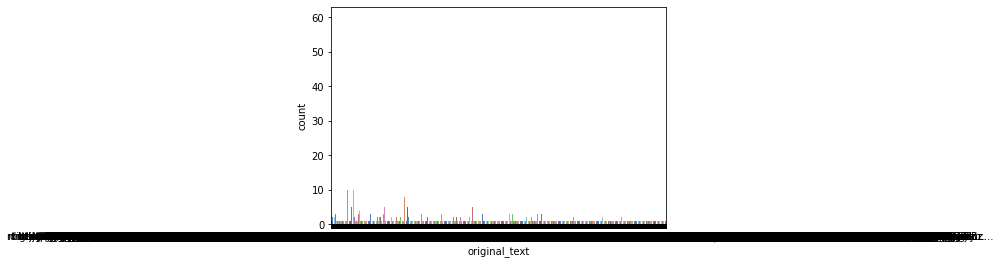

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#breakdown by class
sns.countplot(x="original_text", data=df_train, palette="muted");

In [ ]:
from sklearn.model_selection import train_test_split

used_data, data_to_throw = train_test_split(df_train, test_size=0.5)
train_data, test_data = train_test_split(used_data, test_size=0.2)

In [ ]:
import torchtext
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')

In [ ]:
from collections import Counter, OrderedDict
from torchtext.vocab import vocab
VOCAB_SIZE = 500000
# build the vocab
counter = Counter()
for label, line in enumerate(df_train):
    counter.update(tokenizer(line))

ordered_dict = OrderedDict(counter.most_common()[:VOCAB_SIZE])
vocab = vocab(ordered_dict)

# insert special tokens and set default index to 'unknown'
vocab.insert_token('<PAD>', 0)
vocab.insert_token('<UNK>', 1)
vocab.set_default_index(1)

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
from torchtext.data.functional import to_map_style_dataset

embed_len = 300

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def process_text(text):
    return tokenizer(text)

def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for (_label, *_text) in batch:
      print(_text)
      for text in _text:
        print(text)
        processed_text = process_text(text)
        print(processed_text)
        processed_text = torch.tensor(process_text(text), dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    # label must be in the same size as target
    label_list = torch.tensor(label_list, dtype=torch.float)[:,None]

    text_list = pad_sequence(text_list, batch_first=True)
    lengths = torch.tensor(lengths, dtype=torch.float)
    return text_list.to(device), lengths.to(device)

train_dataset, test_dataset = to_map_style_dataset(df_train), to_map_style_dataset(df_test)
#validation_dataset = to_map_style_dataset(validation_dataset)

train_loader = DataLoader(df_train, batch_size=1024, collate_fn=collate_batch)
#val_loader = DataLoader(validation_dataset, batch_size=1024, collate_fn=collate_batch)
test_loader  = DataLoader(df_test, batch_size=1024, collate_fn=collate_batch)

In [ ]:
X_train = df_x1.iloc[:,0:-1].values
y_train = df_y1.iloc[:,-1].values

X_test = df_x2.iloc[:,0:-1].values
y_test = df_y2.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)#todo

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

In [ ]:
# MLP model using sklearn
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(128,32,8, 4),
                    max_iter = 300,
                    activation = 'relu',
                    solver = 'adam',
                    verbose=True,
                    learning_rate_init=0.004)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 8.07190321
Iteration 2, loss = 5.67207470
Iteration 3, loss = 5.48657394
Iteration 4, loss = 5.47911998
Iteration 5, loss = 5.46777860
Iteration 6, loss = 5.44561590
Iteration 7, loss = 5.39931006
Iteration 8, loss = 5.38336097
Iteration 9, loss = 5.36493322
Iteration 10, loss = 5.37177486
Iteration 11, loss = 5.36476474
Iteration 12, loss = 5.33660130
Iteration 13, loss = 5.32131426
Iteration 14, loss = 5.31129371
Iteration 15, loss = 5.29995351
Iteration 16, loss = 5.31143743
Iteration 17, loss = 5.28396081
Iteration 18, loss = 5.28630272
Iteration 19, loss = 5.27243351
Iteration 20, loss = 5.25879920
Iteration 21, loss = 5.24735729
Iteration 22, loss = 5.23130456
Iteration 23, loss = 5.22328725
Iteration 24, loss = 5.21252774
Iteration 25, loss = 5.21412688
Iteration 26, loss = 5.19915829
Iteration 27, loss = 5.18744718
Iteration 28, loss = 5.18053384
Iteration 29, loss = 5.18402469
Iteration 30, loss = 5.16119051
Iteration 31, loss = 5.14877085
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 32, 8, 4), learning_rate_init=0.004,
              max_iter=300, verbose=True)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

In [ ]:
# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.23

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(ypred, y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : " , accuracy(cm))

Accuracy of MLPClassifier :  0.23


In [ ]:
# other model but not used
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # related to shape of dataset
hidden_size = (50, 50, 50, 50)
#num_classes = 10
output_dim = 1
num_epochs = 300
batch_size = 100 # to be added with optimizer
learning_rate = 0.001

class DeepNeuralNetwork(nn.Module):
    #def __init__(self, input_size, num_classes, num_hidden, hidden_dim, dropout)
    def __init__(self, input_size, hidden_size, output_dim):
        super(DeepNeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size[0]) 
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size[0], hidden_size[1]) 
        self.relu2 = nn.ReLu() 
        self.hidden3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.relu3 = nn.ReLu()
        self.hidden4 = nn.Linear(hidden_size[2], hidden_size[3]) # change dim
        self.relu4 = nn.ReLu()
        self.hidden5 = nn.Linear(hidden_size[3], output_dim)
    
    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu1(out)
        out = self.hidden2(out)
        out = self.relu2(out)
        out = self.hidden3(out)
        out = self.relu3(out)
        out = self.hidden4(out)
        out = self.relu4(out)
        out= self.hidden5(out)
        return out

model = DeepNeuralNetwork(input_size, hidden_size, num_classes).to(device)

# training 
# define the optimization
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
# enumerate epochs
for epoch in range(100):
    # enumerate mini batches
    for i, (inputs, targets) in enumerate(train_dl):
        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        # calculate loss
        loss = criterion(yhat, targets)
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()